## **Neighborhood Filters**

### **Mean Filter**

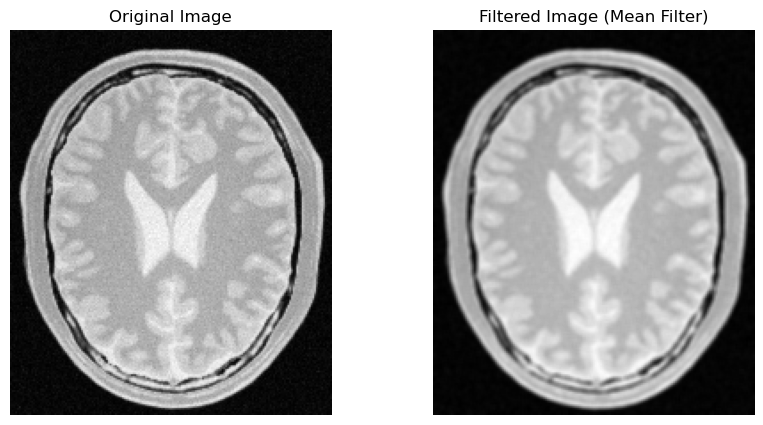

In [25]:
import itk
import matplotlib.pyplot as plt

# Load the input image from the specified path
image_path = "D:/UoM/7th Semester/Academics/Medical Image Processing/Day 4/Kalinga/Images/BrainProtonDensitySlice.png"

# Read the image using ITK
InputImageType = itk.Image[itk.UC, 2]  # Define the input image type (2D, unsigned char)
image = itk.imread(image_path, itk.UC)  # Read the image as an unsigned char (grayscale) image

# Apply the MeanImageFilter
MeanFilterType = itk.MeanImageFilter[InputImageType, InputImageType]
mean_filter = MeanFilterType.New()  # Create a new instance of the MeanImageFilter

# Set the neighborhood radius (e.g., 3x3 neighborhood)
radius = itk.Size[2]()  # Define the size type for 2D images
radius[0] = 1  # Set the radius to 1 along the x-axis, resulting in 3 pixels (1+1+1)
radius[1] = 1  # Set the radius to 1 along the y-axis, resulting in 3 pixels (1+1+1)
mean_filter.SetRadius(radius)  # Apply the radius to the filter

# Set the input image to the filter
mean_filter.SetInput(image)  # Assign the input image to the filter

# Execute the filter to produce the output image
mean_filter.Update()  # Trigger the filter to process the input image and generate the output

# Get the filtered image as a NumPy array for visualization
mean_filtered_image = itk.GetArrayFromImage(mean_filter.GetOutput())

# Plot the original and filtered images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(itk.GetArrayFromImage(image), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mean_filtered_image, cmap='gray')
axes[1].set_title('Filtered Image (Mean Filter)')
axes[1].axis('off')

plt.show()

### **Median Filter**

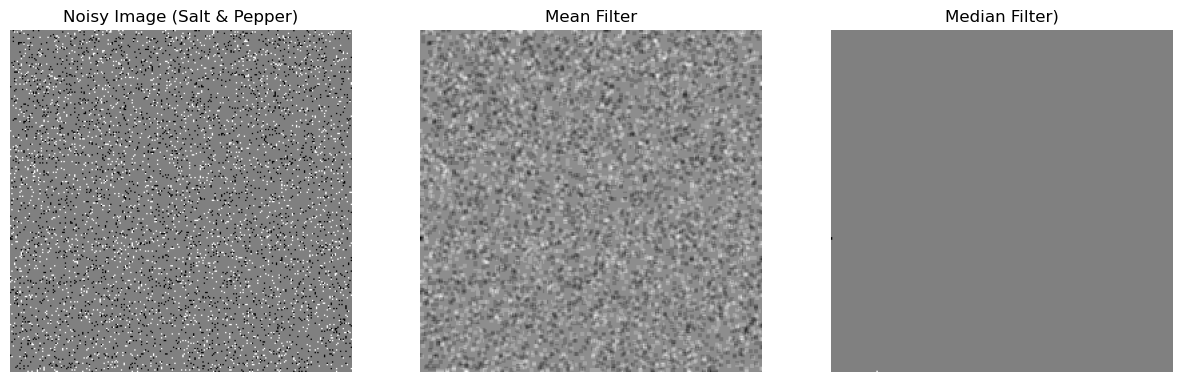

In [26]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# Function to add salt-and-pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    salt_mask = np.random.rand(*image.shape) < salt_prob
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[salt_mask] = 255
    noisy_image[pepper_mask] = 0
    return noisy_image

# Create a sample image (e.g., 256x256 grayscale image with mid-gray intensity)
image_size = (256, 256)
image = np.full(image_size, 128, dtype=np.uint8)

# Add salt-and-pepper noise to the image
salt_prob = 0.05
pepper_prob = 0.05
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

# Convert the noisy image to an ITK image
InputImageType = itk.Image[itk.UC, 2]
itk_image = itk.GetImageFromArray(noisy_image)

# Apply the MeanImageFilter
MeanFilterType = itk.MeanImageFilter[InputImageType, InputImageType]
mean_filter = MeanFilterType.New()

# Apply the MedianImageFilter
MedianFilterType = itk.MedianImageFilter[InputImageType, InputImageType]
median_filter = MedianFilterType.New()

# Set the neighborhood radius (e.g., 3x3 neighborhood)
radius = itk.Size[2]()
radius.Fill(1)  # 1 = radius in each dimension, so 3x3 neighborhood

mean_filter.SetRadius(radius)
median_filter.SetRadius(radius)

# Set the input image and run the filter
mean_filter.SetInput(itk_image)
mean_filter.Update()

# Get the filtered image as a NumPy array
sp_mean_filtered_image = itk.GetArrayFromImage(mean_filter.GetOutput())


# Set the input image and run the filter
median_filter.SetInput(itk_image)
median_filter.Update()

# Get the filtered image as a NumPy array
sp_median_filtered_image = itk.GetArrayFromImage(median_filter.GetOutput())

# Plot the original, noisy, and filtered images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image (Salt & Pepper)')
axes[0].axis('off')

axes[1].imshow(sp_mean_filtered_image, cmap='gray')
axes[1].set_title('Mean Filter')
axes[1].axis('off')

axes[2].imshow(sp_median_filtered_image, cmap='gray')
axes[2].set_title('Median Filter)')
axes[2].axis('off')

plt.show()

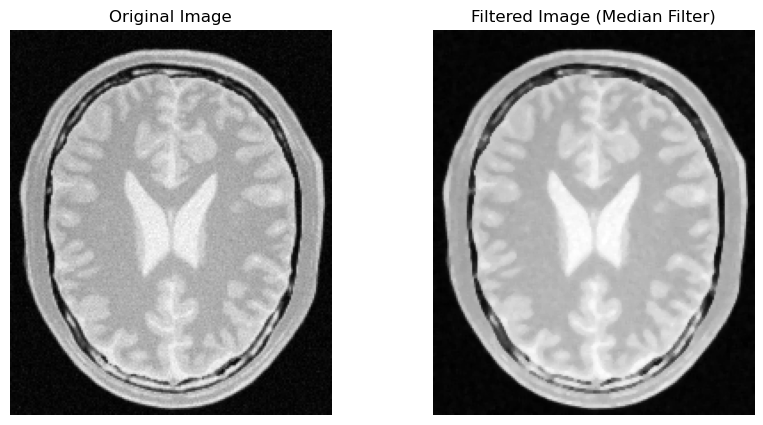

In [27]:
# Load the input image from the specified path
image_path = "D:/UoM/7th Semester/Academics/Medical Image Processing/Day 4/Kalinga/Images/BrainProtonDensitySlice.png"

# Read the image using ITK
InputImageType = itk.Image[itk.UC, 2]  # Define the input image type (2D, unsigned char)
image = itk.imread(image_path, itk.UC)  # Read the image as an unsigned char (grayscale) image

# Apply the MedianImageFilter
MedianFilterType = itk.MedianImageFilter[InputImageType, InputImageType]
median_filter = MedianFilterType.New()  # Create a new instance of the MedianImageFilter

# Set the neighborhood radius (e.g., 3x3 neighborhood)
radius = itk.Size[2]()  # Define the size type for 2D images
radius.Fill(1)  # Set the radius to 1 in both x and y dimensions, resulting in a 3x3 neighborhood
median_filter.SetRadius(radius)  # Apply the radius to the filter

# Set the input image to the filter
median_filter.SetInput(image)  # Assign the input image to the filter

# Execute the filter to produce the output image
median_filter.Update()  # Trigger the filter to process the input image and generate the output

# Get the filtered image as a NumPy array for visualization
median_filtered_image = itk.GetArrayFromImage(median_filter.GetOutput())

# Plot the original and filtered images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(itk.GetArrayFromImage(image), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(median_filtered_image, cmap='gray')
axes[1].set_title('Filtered Image (Median Filter)')
axes[1].axis('off')

plt.show()

### **Changing the neighborhood to 3x5**

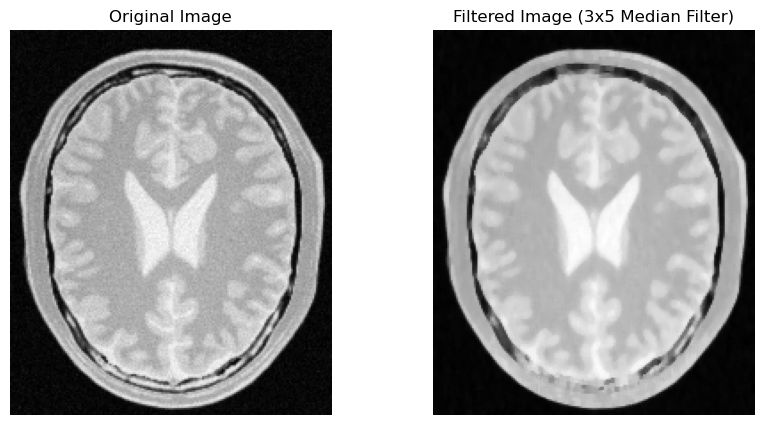

In [28]:
# Set the neighborhood radius to 3x5 (3x5 neighborhood)
radius = itk.Size[2]()  # Define the size type for 2D images
radius[0] = 1  # Set the radius to 1 along the x-axis (resulting in 3 pixels)
radius[1] = 2  # Set the radius to 2 along the y-axis (resulting in 5 pixels)
median_filter.SetRadius(radius)  # Apply the radius to the filter

# Set the input image to the filter
median_filter.SetInput(image)  # Assign the input image to the filter

# Execute the filter to produce the output image
median_filter.Update()  # Trigger the filter to process the input image and generate the output

# Get the filtered image as a NumPy array for visualization
median_filtered_image2 = itk.GetArrayFromImage(median_filter.GetOutput())

# Plot the original and filtered images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(itk.GetArrayFromImage(image), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(median_filtered_image2, cmap='gray')
axes[1].set_title('Filtered Image (3x5 Median Filter)')
axes[1].axis('off')

plt.show()

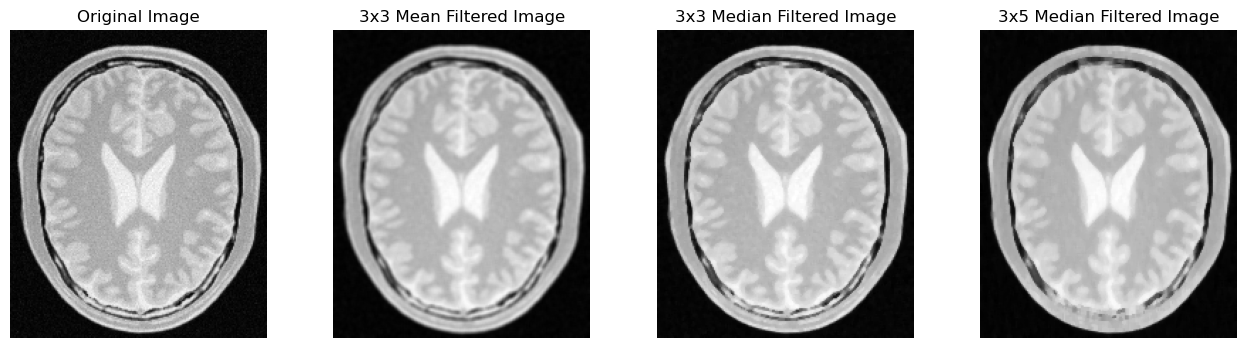

In [29]:
# Plot the original and filtered images side by side for comparison
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(itk.GetArrayFromImage(image), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mean_filtered_image, cmap='gray')
axes[1].set_title('3x3 Mean Filtered Image')
axes[1].axis('off')

axes[2].imshow(median_filtered_image, cmap='gray')
axes[2].set_title('3x3 Median Filtered Image')
axes[2].axis('off')

axes[3].imshow(median_filtered_image2, cmap='gray')
axes[3].set_title('3x5 Median Filtered Image')
axes[3].axis('off')

plt.show()

## **Mathematical Morphology**

### **Binary Filters**

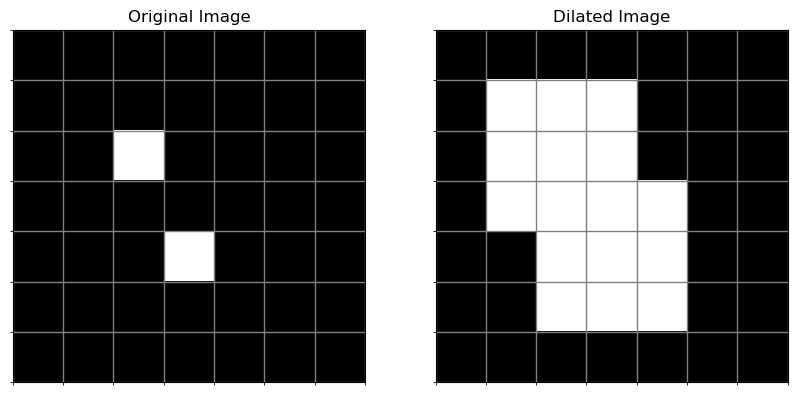

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation

# Original binary image (5x5)
src = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# 3x3 square structuring element
structuring_element = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# Apply dilation using the structuring element
dst = binary_dilation(src, structure=structuring_element).astype(int)

# Plotting the original and dilated images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, img, title in zip(axes, [src, dst], ['Original Image', 'Dilated Image']):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1)
    ax.set_title(title)
    
    # Adding gridlines
    ax.set_xticks(np.arange(-.5, img.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, img.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    
    # Hide the major ticks
    ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

plt.show()

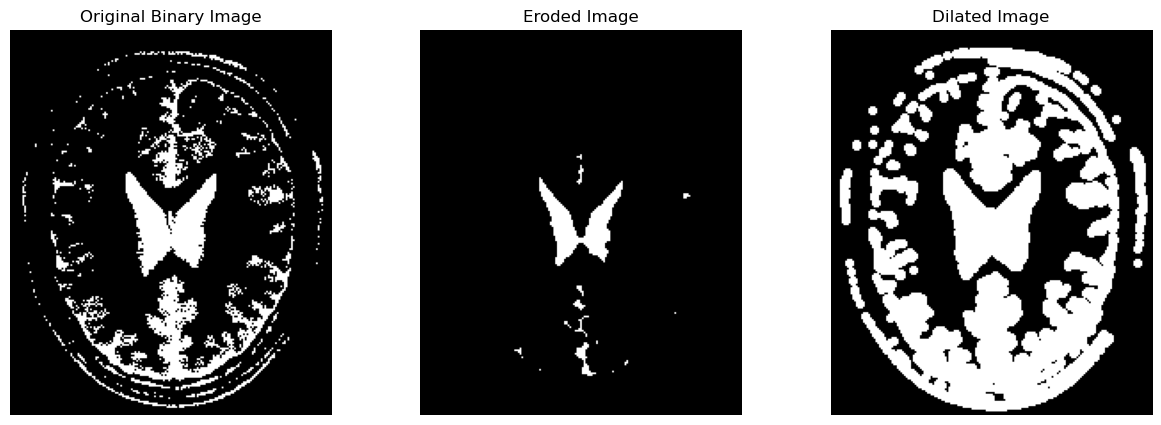

In [32]:
# Apply binary thresholding to create a binary image
thresholder = itk.BinaryThresholdImageFilter[InputImageType, InputImageType].New() # Create a new instance of the binary thresholding filter class
thresholder.SetInput(image) # Set the input image
thresholder.SetLowerThreshold(200)  # Example threshold values
thresholder.SetUpperThreshold(255) # Example threshold values
thresholder.SetOutsideValue(0)  # Background value
thresholder.SetInsideValue(255)  # Foreground value
thresholder.Update() # Trigger the filter to process the input image and generate the output

binary_image = thresholder.GetOutput() # Get the binary image as the output

# Define the structuring element for erosion and dilation
# StructuringElementType = itk.BinaryBallStructuringElement[itk.UC, 2] # 'itk' has no attribute 'BinaryBallStructuringElement', designed for binary morphological operations
StructuringElementType = itk.FlatStructuringElement[2]  # Use 2D structuring element
# structuring_element = StructuringElementType.Ball(1)  # Create a 3x3 ball-shaped structuring element with a radius of 1
# 0 1 0
# 1 1 1
# 0 1 0

structuring_element = StructuringElementType.Ball(2)  # Create a 5x5 ball-shaped structuring element with a radius of 2
# 0 0 1 0 0
# 0 1 1 1 0
# 1 1 1 1 1
# 0 1 1 1 0
# 0 0 1 0 0

# Apply Binary Erode Filter
ErodeFilterType = itk.BinaryErodeImageFilter[InputImageType, InputImageType, StructuringElementType] # Create an instance of the filter type for binary erosion class
binary_erode = ErodeFilterType.New() # Create a new instance of the binary erode filter
binary_erode.SetInput(binary_image) # Set the input binary image
binary_erode.SetKernel(structuring_element) # Set the structuring element
binary_erode.SetErodeValue(255)  # Apply erosion to the foreground (255)
binary_erode.Update() # Trigger the filter to process the input image and generate the output

# Apply Binary Dilate Filter
DilateFilterType = itk.BinaryDilateImageFilter[InputImageType, InputImageType, StructuringElementType] # Create an instance of the filter type for binary dilation class
binary_dilate = DilateFilterType.New() # Create a new instance of the binary dilate filter
binary_dilate.SetInput(binary_image) # Set the input binary image
binary_dilate.SetKernel(structuring_element) # Set the structuring element
binary_dilate.SetDilateValue(255)  # Apply dilation to the foreground (255)
binary_dilate.Update() # Trigger the filter to process the input image and generate the output

# Get the eroded and dilated images as NumPy arrays for visualization
eroded_image = itk.GetArrayFromImage(binary_erode.GetOutput()) # Get the eroded image as a NumPy array
dilated_image = itk.GetArrayFromImage(binary_dilate.GetOutput()) # Get the dilated image as a NumPy array

# Plot the original binary, eroded, and dilated images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(itk.GetArrayFromImage(binary_image), cmap='gray')
axes[0].set_title('Original Binary Image')
axes[0].axis('off')

axes[1].imshow(eroded_image, cmap='gray')
axes[1].set_title('Eroded Image')
axes[1].axis('off')

axes[2].imshow(dilated_image, cmap='gray')
axes[2].set_title('Dilated Image')
axes[2].axis('off')

plt.show()

### **Grayscale Filters**

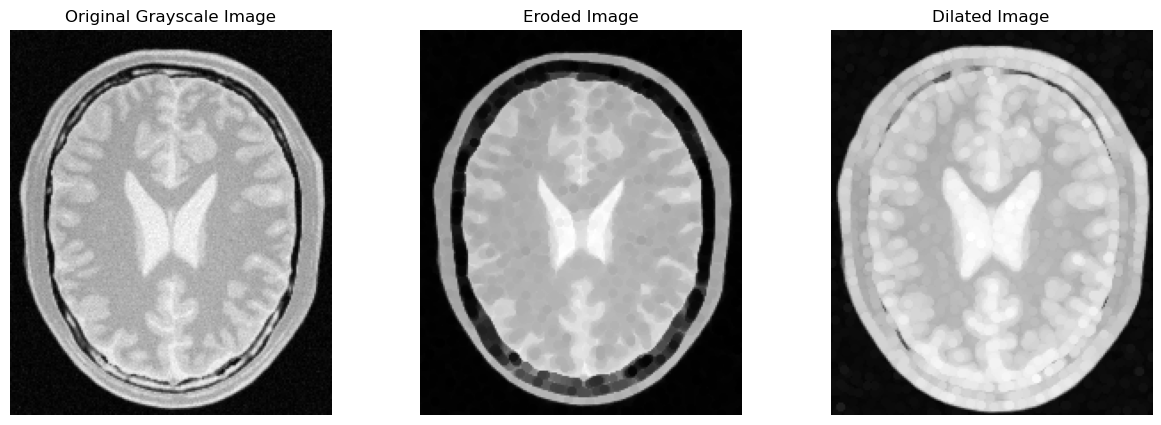

In [34]:
# Define the structuring element for erosion and dilation
StructuringElementType = itk.FlatStructuringElement[2] # Designed for both binary and grayscale morphological operations.
# structuring_element = StructuringElementType.Ball(1)  # Create a 3x3 ball-shaped structuring element
structuring_element = StructuringElementType.Ball(2)  # Create a 3x3 ball-shaped structuring element

# Apply Grayscale Erode Filter
ErodeFilterType = itk.GrayscaleErodeImageFilter[InputImageType, InputImageType, StructuringElementType]
grayscale_erode = ErodeFilterType.New()
grayscale_erode.SetInput(image)
grayscale_erode.SetKernel(structuring_element)
grayscale_erode.Update()

# Apply Grayscale Dilate Filter
DilateFilterType = itk.GrayscaleDilateImageFilter[InputImageType, InputImageType, StructuringElementType]
grayscale_dilate = DilateFilterType.New()
grayscale_dilate.SetInput(image)
grayscale_dilate.SetKernel(structuring_element)
grayscale_dilate.Update()

# Get the eroded and dilated images as NumPy arrays for visualization
eroded_image = itk.GetArrayFromImage(grayscale_erode.GetOutput())
dilated_image = itk.GetArrayFromImage(grayscale_dilate.GetOutput())

# Plot the original, eroded, and dilated images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(itk.GetArrayFromImage(image), cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(eroded_image, cmap='gray')
axes[1].set_title('Eroded Image')
axes[1].axis('off')

axes[2].imshow(dilated_image, cmap='gray')
axes[2].set_title('Dilated Image')
axes[2].axis('off')

plt.show()

In [19]:
import itk

# Check if GrayscaleErodeImageFilter exists
try:
    filter_exists = hasattr(itk, 'GrayscaleErodeImageFilter')
    if filter_exists:
        print("GrayscaleErodeImageFilter exists in this ITK version.")
    else:
        print("GrayscaleErodeImageFilter does NOT exist in this ITK version.")
except AttributeError as e:
    print(f"Error: {e}")

GrayscaleErodeImageFilter exists in this ITK version.


## **Voting Filters**

### **Binary Median Filter**

In [99]:
# Define the Binary Median Filter
FilterType = itk.BinaryMedianImageFilter[InputImageType, InputImageType]
binary_median_filter = FilterType.New()

# Set the neighborhood radius (e.g., 5x5 neighborhood)
radiusX = 2  # Radius along x-axis
radiusY = 2  # Radius along y-axis
indexRadius = itk.Size[2]()
indexRadius[0] = radiusX
indexRadius[1] = radiusY
binary_median_filter.SetRadius(indexRadius)

# Set the input image to the filter
binary_median_filter.SetInput(image)

# Execute the filter to produce the output image
binary_median_filter.Update()

# Get the filtered image as a NumPy array for visualization
filtered_image = itk.GetArrayFromImage(binary_median_filter.GetOutput())

# Plot the original and filtered images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(itk.GetArrayFromImage(image), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Binary Image')
axes[0].axis('off')

axes[1].imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Filtered Image (Binary Median)')
axes[1].axis('off')

plt.show()

In [20]:
# Check if BinaryMedianImageFilter exists
try:
    filter_exists = hasattr(itk, 'BinaryMedianImageFilter')
    if filter_exists:
        print("BinaryMedianImageFilter exists in this ITK version.")
    else:
        print("BinaryMedianImageFilter does NOT exist in this ITK version.")
except AttributeError as e:
    print(f"Error: {e}")

BinaryMedianImageFilter does NOT exist in this ITK version.


There is no version of the ITK Python bindings that includes a direct implementation of BinaryMedianImageFilter. The Python version of ITK focuses on wrapping the most commonly used filters and functionality.

### **Hole Filling Filter**

#### **Voting Binary Hole Filling Filter**

In [21]:
# Apply binary thresholding to create a binary image
thresholder = itk.BinaryThresholdImageFilter[InputImageType, InputImageType].New() # Create a new instance of the binary thresholding filter class
thresholder.SetInput(image) # Set the input image
thresholder.SetLowerThreshold(200)  # Example threshold values
thresholder.SetUpperThreshold(255) # Example threshold values
thresholder.SetOutsideValue(0)  # Background value
thresholder.SetInsideValue(255)  # Foreground value
thresholder.Update() # Trigger the filter to process the input image and generate the output

binary_image = thresholder.GetOutput() # Get the binary image as the output

# Define the Voting Binary Hole Filling Filter
FilterType = itk.VotingBinaryHoleFillingImageFilter[InputImageType, InputImageType]
hole_filling_filter = FilterType.New()

# Set the neighborhood radius (e.g., 3x5 neighborhood)
radiusX = 1  # Radius along x-axis
radiusY = 2  # Radius along y-axis
indexRadius = itk.Size[2]() # Define the size type for 2D images
indexRadius[0] = radiusX
indexRadius[1] = radiusY
hole_filling_filter.SetRadius(indexRadius)

# Set background and foreground values
hole_filling_filter.SetBackgroundValue(0)  # Background pixel value (typically 0)
hole_filling_filter.SetForegroundValue(255)  # Foreground pixel value (typically 255)

# Set the Majority Threshold
hole_filling_filter.SetMajorityThreshold(2)  # The majority threshold for deciding pixel state

# Set the input image to the filter
hole_filling_filter.SetInput(binary_image) # Should be a binary image (0 or 255)

# Execute the filter to produce the output image
hole_filling_filter.Update()

# Get the filtered image as a NumPy array for visualization
filtered_image = itk.GetArrayFromImage(hole_filling_filter.GetOutput())

# Plot the original and filtered images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(itk.GetArrayFromImage(binary_image), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Binary Image')
axes[0].axis('off')

axes[1].imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Filtered Image (Hole Filling)')
axes[1].axis('off')

plt.show()

In [22]:
# Check if VotingBinaryHoleFillingImageFilter exists
try:
    filter_exists = hasattr(itk, 'VotingBinaryHoleFillingImageFilter')
    if filter_exists:
        print("VotingBinaryHoleFillingImageFilter exists in this ITK version.")
    else:
        print("VotingBinaryHoleFillingImageFilter does NOT exist in this ITK version.")
except AttributeError as e:
    print(f"Error: {e}")

VotingBinaryHoleFillingImageFilter does NOT exist in this ITK version.


#### **Iterative Hole Filling Filter**

In [24]:
# Apply binary thresholding to create a binary image
thresholder = itk.BinaryThresholdImageFilter[InputImageType, InputImageType].New() # Create a new instance of the binary thresholding filter class
thresholder.SetInput(image) # Set the input image
thresholder.SetLowerThreshold(200)  # Example threshold values
thresholder.SetUpperThreshold(255) # Example threshold values
thresholder.SetOutsideValue(0)  # Background value
thresholder.SetInsideValue(255)  # Foreground value
thresholder.Update() # Trigger the filter to process the input image and generate the output

binary_image = thresholder.GetOutput() # Get the binary image as the output

# Define the Voting Binary Iterative Hole Filling Filter
FilterType = itk.VotingBinaryIterativeHoleFillingImageFilter[InputImageType]
iterative_hole_filling_filter = FilterType.New()

# Set the same parameters as before
iterative_hole_filling_filter.SetRadius(indexRadius)
iterative_hole_filling_filter.SetBackgroundValue(0)
iterative_hole_filling_filter.SetForegroundValue(255)
iterative_hole_filling_filter.SetMajorityThreshold(2)

# Set the maximum number of iterations
iterative_hole_filling_filter.SetMaximumNumberOfIterations(10)  # Example: Run up to 10 iterations

# Set the input image to the filter
iterative_hole_filling_filter.SetInput(binary_image) # Should be a binary image (0 or 255)

# Execute the filter to produce the output image
iterative_hole_filling_filter.Update()

# Get the filtered image as a NumPy array for visualization
filtered_image_iterative = itk.GetArrayFromImage(iterative_hole_filling_filter.GetOutput())

# Plot the original and iteratively filtered images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(itk.GetArrayFromImage(binary_image), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Binary Image')
axes[0].axis('off')

axes[1].imshow(filtered_image_iterative, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Filtered Image (Iterative Hole Filling)')
axes[1].axis('off')

plt.show()

In [23]:
# Check if VotingBinaryIterativeHoleFillingImageFilter exists
try:
    filter_exists = hasattr(itk, 'VotingBinaryIterativeHoleFillingImageFilter')
    if filter_exists:
        print("VotingBinaryIterativeHoleFillingImageFilter exists in this ITK version.")
    else:
        print("VotingBinaryIterativeHoleFillingImageFilter does NOT exist in this ITK version.")
except AttributeError as e:
    print(f"Error: {e}")

VotingBinaryIterativeHoleFillingImageFilter does NOT exist in this ITK version.
